In [92]:
TRAIN_PATH = "dataset/Train"
VAL_PATH = "dataset/Val"

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [94]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [95]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 54, 54, 64)       

In [96]:
from keras.preprocessing.image import ImageDataGenerator

In [97]:
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    shear_range = 0.2,
    horizontal_flip=True,
    zoom_range = 0.2,
    )
test_dataset = ImageDataGenerator(
    rescale=1/255.0
)

In [98]:
train_generator = train_datagen.flow_from_directory(
    'dataset/Train',
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    shuffle=True
)

Found 334 images belonging to 2 classes.


In [99]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [100]:
validation_generator = test_dataset.flow_from_directory(
    'dataset/Val',
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    shuffle=True
)

Found 58 images belonging to 2 classes.


In [124]:
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=8,
        epochs=7,
        validation_data = validation_generator,
        validation_steps = 2,
    )

Epoch 1/7
8/8 [==============================] - 28s 3s/step - loss: 0.0648 - accuracy: 0.9832 - val_loss: 0.0645 - val_accuracy: 0.9655
Epoch 2/7
8/8 [==============================] - 33s 4s/step - loss: 0.0929 - accuracy: 0.9805 - val_loss: 0.0675 - val_accuracy: 0.9655
Epoch 3/7
8/8 [==============================] - 31s 4s/step - loss: 0.1380 - accuracy: 0.9580 - val_loss: 0.0960 - val_accuracy: 0.9828
Epoch 4/7
8/8 [==============================] - 31s 4s/step - loss: 0.1204 - accuracy: 0.9648 - val_loss: 0.0767 - val_accuracy: 0.9828
Epoch 5/7
8/8 [==============================] - 33s 4s/step - loss: 0.1140 - accuracy: 0.9664 - val_loss: 0.0961 - val_accuracy: 0.9655
Epoch 6/7
8/8 [==============================] - 32s 4s/step - loss: 0.0840 - accuracy: 0.9664 - val_loss: 0.0893 - val_accuracy: 0.9655
Epoch 7/7
8/8 [==============================] - 31s 4s/step - loss: 0.2134 - accuracy: 0.9160 - val_loss: 0.1072 - val_accuracy: 0.9655


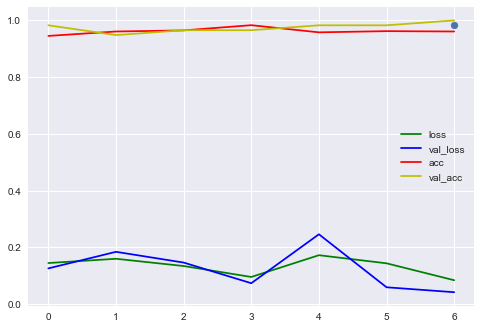

In [104]:
plt.figure(0)
plt.style.use("seaborn")
plt.plot(hist.history["loss"], "g", label="loss")
plt.plot(hist.history["val_loss"], "b", label="val_loss")
plt.plot(hist.history["accuracy"], "r", label="acc")
plt.plot(hist.history["val_accuracy"], "y", label="val_acc")
plt.scatter(6,0.9828)
plt.legend()
plt.show()

In [152]:
model.save("Models/Model-15-98.28/Model-15-98.28.h5")

In [155]:
new_model = keras.models.load_model("Models/Model-15-98.28/Model-15-98.28.h5")

In [156]:
new_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 54, 54, 64)       

In [145]:
idx2cond = {v: k for k, v in train_generator.class_indices.items()}

In [150]:
img = image.load_img("dataset/Train/Normal/IM-0303-0001.jpeg", target_size=(224,224,3,1))
img = image.img_to_array(img)
test = np.array([img])
test.shape
class_op = model.predict_classes(test)
print(idx2cond[class_op[0][0]])

Normal
